In [1]:
import nltk

In [2]:
import re
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pd.set_option("display.max_colwidth",200)
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [4]:
train = pd.read_csv('train_E6oV3lV.csv')
test = pd.read_csv('test_tweets_anuFYb8.csv')

In [5]:
train[train['label']==0].head(14)

id  label  \
0    1      0   
1    2      0   
2    3      0   
3    4      0   
4    5      0   
5    6      0   
6    7      0   
7    8      0   
8    9      0   
9   10      0   
10  11      0   
11  12      0   
12  13      0   
15  16      0   

                                                                                                                                              tweet  
0                                             @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run  
1                        @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked  
2                                                                                                                               bihday your majesty  
3                                                            #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦    
4                                                                                                            factsguide: society now    #motivation  
5                              [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo    
6                                                                         @user camping tomorrow @user @user @user @user @user @user @user dannyâ¦  
7   the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams   #hate #imagine #actorslife #revolutionschool #girl  
8                                                           we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â¦   
9                                                                                                 @user @user welcome here !  i'm   it's so #gr8 !   
10                                   â #ireland consumer price index (mom) climbed from previous 0.2% to 0.5% in may   #blog #silver #gold #forex  
11            we are so selfish. #orlando #standwithorlando #pulseshooting #orlandoshooting #biggerproblems #selfish #heabreaking   #values #love #  
12                                                                                              i get to see my daddy today!!   #80days #gettingfed  
15                                                                                         ouch...junior is angryð#got7 #junior #yugyoem   #omg

In [6]:
train[train['label']==1].head(14)

id  label  \
13    14      1   
14    15      1   
17    18      1   
23    24      1   
34    35      1   
56    57      1   
68    69      1   
77    78      1   
82    83      1   
111  112      1   
114  115      1   
131  132      1   
151  152      1   
156  157      1   

                                                                                                                                 tweet  
13                                                          @user #cnn calls #michigan middle school 'build the wall' chant '' #tcot    
14                               no comment!  in #australia   #opkillingbay #seashepherd #helpcovedolphins #thecove  #helpcovedolphins  
17                                                                                                              retweet if you agree!   
23                                                                                     @user @user lumpy says i am a . prove it lumpy.  
34                            it's unbelievable that in the 21st century we'd need something like this. again. #neverump  #xenophobia   
56                                                                                             @user lets fight against  #love #peace   
68                      ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness    
77                                             @user hey, white people: you can call people 'white' by @user  #race  #identity #medâ¦  
82                                                       how the #altright uses  &amp; insecurity to lure men into #whitesupremacy      
111  @user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦  
114                                                 @user why not @user mocked obama for being black.  @user @user @user @user #brexit  
131                         #people aren't protesting #trump because a #republican won-they do so because trump has fuhered  &amp;â¦   
151                   yes it's  when you call #michelleobama a gorilla because racists have long thought of black people as no betâ¦   
156                    as the smaller hands show, barry probably lied about  being why his #knicks game sucked more than his #golfâ¦

In [7]:
train.shape

(31962, 3)

In [8]:
test.shape

(17197, 2)

In [9]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

## ~7% of the data have the -ve sentiment

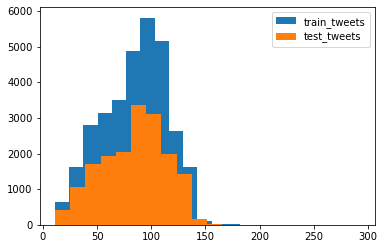

In [10]:
len_train = train['tweet'].str.len()
len_test = test['tweet'].str.len()
plt.hist(len_train,bins=20,label="train_tweets")
plt.hist(len_test,bins=20,label="test_tweets")
plt.legend()
plt.show()

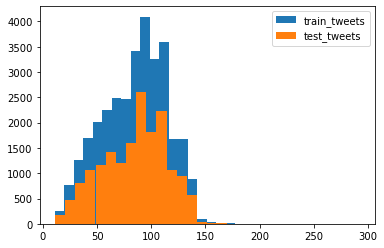

In [11]:
len_train = train['tweet'].str.len()
len_test = test['tweet'].str.len()
plt.hist(len_train,bins=30,label="train_tweets")
plt.hist(len_test,bins=30,label="test_tweets")
plt.legend()
plt.show()

### BINS - How many no. of intervals u wanna divide your data into

# Text Processing

In [12]:
combin = train.append(test,ignore_index=True)
combin.shape

(49159, 3)

In [13]:
def remove_pattern(input_text,pattern):
    r=re.findall(pattern,input_text)
    for i in r:
        input_text=re.sub(i,'',input_text)
    return input_text

In [14]:
#removing the <@user>
combin['clean'] = np.vectorize(remove_pattern)(combin['tweet'],"@[\w]*")
combin.head()

id  label  \
0   1    0.0   
1   2    0.0   
2   3    0.0   
3   4    0.0   
4   5    0.0   

                                                                                                                        tweet  \
0                       @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run   
1  @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked   
2                                                                                                         bihday your majesty   
3                                      #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦     
4                                                                                      factsguide: society now    #motivation   

                                                                                                              clean  
0                   when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run  
1    thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked  
2                                                                                               bihday your majesty  
3                            #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦    
4                                                                            factsguide: society now    #motivation

In [15]:
#removing puntucation,spl symbols
combin['clean']=combin['clean'].str.replace("[^a-zA-Z#]"," ")
combin.head(10)

id  label  \
0   1    0.0   
1   2    0.0   
2   3    0.0   
3   4    0.0   
4   5    0.0   
5   6    0.0   
6   7    0.0   
7   8    0.0   
8   9    0.0   
9  10    0.0   

                                                                                                                                             tweet  \
0                                            @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run   
1                       @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked   
2                                                                                                                              bihday your majesty   
3                                                           #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦     
4                                                                                                           factsguide: society now    #motivation   
5                             [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo     
6                                                                        @user camping tomorrow @user @user @user @user @user @user @user dannyâ¦   
7  the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams   #hate #imagine #actorslife #revolutionschool #girl   
8                                                          we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â¦    
9                                                                                                @user @user welcome here !  i'm   it's so #gr8 !    

                                                                                                                                             clean  
0                                                  when a father is dysfunctional and is so selfish he drags his kids into his dysfunction    #run  
1                                   thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx     #disapointed #getthanked  
2                                                                                                                              bihday your majesty  
3                                                           #model   i love u take with u all the time in ur                                        
4                                                                                                           factsguide  society now    #motivation  
5                                   huge fan fare and big talking before they leave  chaos and pay disputes when they get there  #allshowandnogo    
6                                                                                                                 camping tomorrow        danny     
7  the next school year is the year for exams      can t think about that      #school #exams   #hate #imagine #actorslife #revolutionschool #girl  
8                                                          we won    love the land    #allin #cavs #champions #cleveland #clevelandcavaliers        
9                                                                                                            welcome here    i m   it s so #gr

In [16]:
#removing words with length less than 3
combin['clean']=combin['clean'].apply(lambda x:' '.join([w for w in x.split() if len(w)>3]))
combin.head(10)

id  label  \
0   1    0.0   
1   2    0.0   
2   3    0.0   
3   4    0.0   
4   5    0.0   
5   6    0.0   
6   7    0.0   
7   8    0.0   
8   9    0.0   
9  10    0.0   

                                                                                                                                             tweet  \
0                                            @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run   
1                       @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked   
2                                                                                                                              bihday your majesty   
3                                                           #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦     
4                                                                                                           factsguide: society now    #motivation   
5                             [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo     
6                                                                        @user camping tomorrow @user @user @user @user @user @user @user dannyâ¦   
7  the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams   #hate #imagine #actorslife #revolutionschool #girl   
8                                                          we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â¦    
9                                                                                                @user @user welcome here !  i'm   it's so #gr8 !    

                                                                                                            clean  
0                                              when father dysfunctional selfish drags kids into dysfunction #run  
1                                   thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked  
2                                                                                             bihday your majesty  
3                                                                                      #model love take with time  
4                                                                                  factsguide society #motivation  
5                              huge fare talking before they leave chaos disputes when they there #allshowandnogo  
6                                                                                          camping tomorrow danny  
7  next school year year exams think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl  
8                                                love land #allin #cavs #champions #cleveland #clevelandcavaliers  
9                                                                                                    welcome here

In [17]:
#stemming the words
tokens = combin['clean'].apply(lambda x:x.split())
tokens.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: clean, dtype: object

In [18]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokens = tokens.apply(lambda x:[stemmer.stem(i) for i in x])

In [19]:
for i in range(len(tokens)):
    tokens[i]=' '.join(tokens[i])
combin['clean']=tokens
combin.head(14)

id  label  \
0    1    0.0   
1    2    0.0   
2    3    0.0   
3    4    0.0   
4    5    0.0   
5    6    0.0   
6    7    0.0   
7    8    0.0   
8    9    0.0   
9   10    0.0   
10  11    0.0   
11  12    0.0   
12  13    0.0   
13  14    1.0   

                                                                                                                                              tweet  \
0                                             @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run   
1                        @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked   
2                                                                                                                               bihday your majesty   
3                                                            #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦     
4                                                                                                            factsguide: society now    #motivation   
5                              [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo     
6                                                                         @user camping tomorrow @user @user @user @user @user @user @user dannyâ¦   
7   the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams   #hate #imagine #actorslife #revolutionschool #girl   
8                                                           we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â¦    
9                                                                                                 @user @user welcome here !  i'm   it's so #gr8 !    
10                                   â #ireland consumer price index (mom) climbed from previous 0.2% to 0.5% in may   #blog #silver #gold #forex   
11            we are so selfish. #orlando #standwithorlando #pulseshooting #orlandoshooting #biggerproblems #selfish #heabreaking   #values #love #   
12                                                                                              i get to see my daddy today!!   #80days #gettingfed   
13                                                                       @user #cnn calls #michigan middle school 'build the wall' chant '' #tcot     

                                                                                                         clean  
0                                                     when father dysfunct selfish drag kid into dysfunct #run  
1                                       thank #lyft credit caus they offer wheelchair van #disapoint #getthank  
2                                                                                          bihday your majesti  
3                                                                                   #model love take with time  
4                                                                                     factsguid societi #motiv  
5                                   huge fare talk befor they leav chao disput when they there #allshowandnogo  
6                                                                                          camp tomorrow danni  
7   next school year year exam think about that #school #exam #hate #imagin #actorslif #revolutionschool #girl  
8                                                  love land #allin #cav #champion #cleveland #clevelandcavali  
9                                                                                                  welcom here  
10                                   #ireland consum price index climb from previou #blog #silver #gold #forex  
11  selfish #orlando #standwithorlando #pulseshoot #orlandoshoot #biggerproblem #selfish #heabreak #valu #love  
12           

In [20]:
from wordcloud import WordCloud
words = ' '.join([t for t in combin['clean']])
words

'when father dysfunct selfish drag kid into dysfunct #run thank #lyft credit caus they offer wheelchair van #disapoint #getthank bihday your majesti #model love take with time factsguid societi #motiv huge fare talk befor they leav chao disput when they there #allshowandnogo camp tomorrow danni next school year year exam think about that #school #exam #hate #imagin #actorslif #revolutionschool #girl love land #allin #cav #champion #cleveland #clevelandcavali welcom here #ireland consum price index climb from previou #blog #silver #gold #forex selfish #orlando #standwithorlando #pulseshoot #orlandoshoot #biggerproblem #selfish #heabreak #valu #love daddi today day #gettingf #cnn call #michigan middl school build wall chant #tcot comment #australia #opkillingbay #seashepherd #helpcovedolphin #thecov #helpcovedolphin ouch junior angri #got #junior #yugyoem #omg thank have paner #thank #posit retweet agre #friday smile around user #cooki make peopl know essenti oil made chemic #euro peopl 

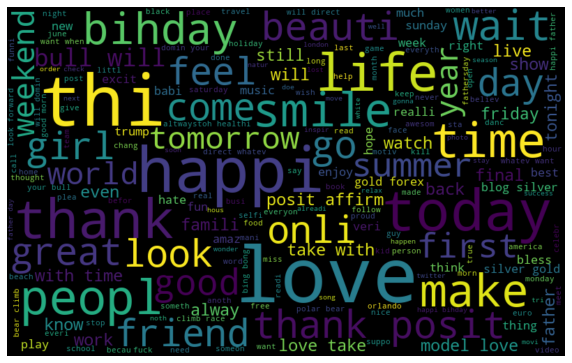

In [21]:
#common words used in the total text -- words
wc = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(words)
plt.figure(figsize=(10,7))
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

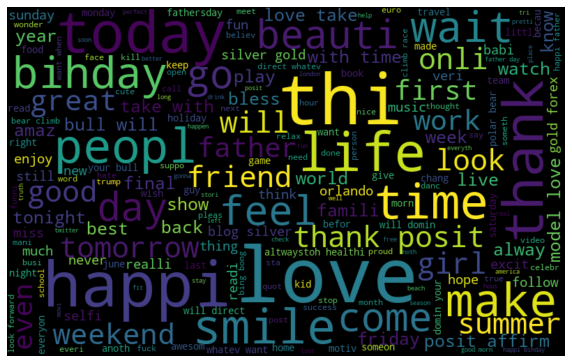

In [22]:
positive = ' '.join([x for x in combin['clean'][combin['label']==0]])
wc = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(positive)
plt.figure(figsize=(10,7))
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

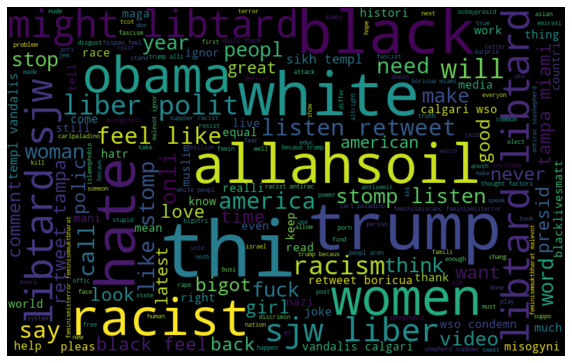

In [23]:
negative = ' '.join([x for x in combin['clean'][combin['label']==1]])
wc = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(negative)
plt.figure(figsize=(10,7))
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [24]:
# function to collect hashtags 
def hashtag_extract(x):
    hashtags = []    
# Loop over the words in the tweet    
    for i in x:        
        ht = re.findall(r"#(\w+)", i)        
        hashtags.append(ht)     
    return hashtags

In [25]:
HT_reg = hashtag_extract(combin['clean'][combin['label']==0])
HT_neg = hashtag_extract(combin['clean'][combin['label']==1])
print(HT_reg)

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv'], ['allshowandnogo'], [], ['school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl'], ['allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'], [], ['ireland', 'blog', 'silver', 'gold', 'forex'], ['orlando', 'standwithorlando', 'pulseshoot', 'orlandoshoot', 'biggerproblem', 'selfish', 'heabreak', 'valu', 'love'], ['gettingf'], ['got', 'junior', 'yugyoem', 'omg'], ['thank', 'posit'], ['friday', 'cooki'], [], ['euro'], ['badday', 'coneofsham', 'cat', 'piss', 'funni', 'laugh'], ['wine', 'weekend'], ['tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad'], ['upsideofflorida', 'shopalyssa', 'love'], ['smile', 'media', 'pressconfer', 'antalya', 'turkey', 'throwback'], ['ica'], [], ['rip', 'orlando'], [], ['alohafriday', 'time', 'not', 'exist', 'positivevib', 'hawaiian'], [], ['goodnight', 'badmonday'], ['taylorswift'], ['travelingram', 'dalat', 'ripinkylif'], ['photoshop', 'enoughisenough', 'dontphoto

In [26]:
#unnesting in list 
HT_reg = sum(HT_reg,[])
HT_neg = sum(HT_neg,[])
print(HT_reg)

['run', 'lyft', 'disapoint', 'getthank', 'model', 'motiv', 'allshowandnogo', 'school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl', 'allin', 'cav', 'champion', 'cleveland', 'clevelandcavali', 'ireland', 'blog', 'silver', 'gold', 'forex', 'orlando', 'standwithorlando', 'pulseshoot', 'orlandoshoot', 'biggerproblem', 'selfish', 'heabreak', 'valu', 'love', 'gettingf', 'got', 'junior', 'yugyoem', 'omg', 'thank', 'posit', 'friday', 'cooki', 'euro', 'badday', 'coneofsham', 'cat', 'piss', 'funni', 'laugh', 'wine', 'weekend', 'tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad', 'upsideofflorida', 'shopalyssa', 'love', 'smile', 'media', 'pressconfer', 'antalya', 'turkey', 'throwback', 'ica', 'rip', 'orlando', 'alohafriday', 'time', 'not', 'exist', 'positivevib', 'hawaiian', 'goodnight', 'badmonday', 'taylorswift', 'travelingram', 'dalat', 'ripinkylif', 'photoshop', 'enoughisenough', 'dontphotoshopeveryth', 'wheresallthenaturalphoto', 'cedarpoint', 'thank', 'posit', 'book

In [27]:
type(HT_reg)

list

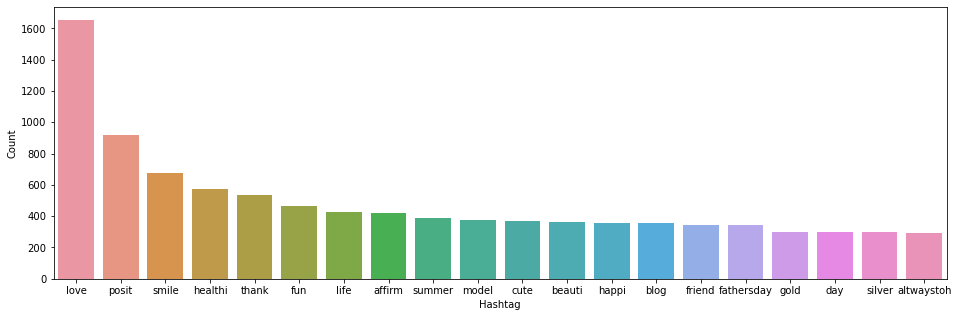

In [28]:
#plotting the common words in the hashtags
a=nltk.FreqDist(HT_reg)
d=pd.DataFrame({'Hashtag':list(a.keys()),'Count':list(a.values())})
d=d.nlargest(columns="Count",n=20)
plt.figure(figsize=(16,5))
plot = sns.barplot(data=d,x="Hashtag",y="Count")
plot.set(ylabel='Count')
plt.show()

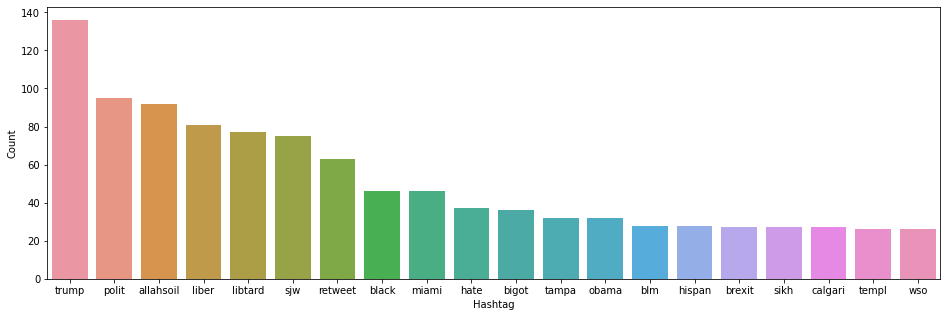

In [29]:
a=nltk.FreqDist(HT_neg)
d=pd.DataFrame({'Hashtag':list(a.keys()),'Count':list(a.values())})
d=d.nlargest(columns="Count",n=20)
plt.figure(figsize=(16,5))
plot = sns.barplot(data=d,x="Hashtag",y="Count")
plot.set(ylabel='Count')
plt.show()

# Analysing the processed text data

## Bag-Of-Words

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer 
#import gensim

In [31]:
bow_vectorizer = CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
bow = bow_vectorizer.fit_transform(combin['clean'])
bow.shape

(49159, 1000)

In [32]:
bow

<49159x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 191505 stored elements in Compressed Sparse Row format>

## TF-IDF Vectorizer

In [33]:
tfidf_vectorizer=TfidfVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combin['clean'])
tfidf.shape

(49159, 1000)

## Word2Vec

In [34]:
import gensim
token_tweet = combin['clean'].apply(lambda x: x.split())

In [35]:
model_w2v = gensim.models.Word2Vec(token_tweet, size=200,window=5,min_count=2,sg=1,hs=0,negative=10,workers=2,
                                   seed=34)
model_w2v.train(token_tweet,total_examples=len(combin['clean']),epochs=20)


(6510514, 7536020)

## Now we have vectorized the words, now we will play with it

In [36]:
model_w2v.wv.most_similar(positive="dinner")

[('spaghetti', 0.564152717590332),
 ('cookout', 0.539145827293396),
 ('spinach', 0.5342374444007874),
 ('dess', 0.5327633619308472),
 ('#biall', 0.5325667262077332),
 ('#avocado', 0.5250495672225952),
 ('#corgi', 0.5240051746368408),
 ('#cellar', 0.5228387713432312),
 ('missu', 0.5216673016548157),
 ('#pasta', 0.5208859443664551)]

In [37]:
model_w2v.wv.most_similar(positive="silver")

[('#baahubali', 0.7471445798873901),
 ('sterl', 0.7018378973007202),
 ('bullet', 0.6976083517074585),
 ('#commod', 0.6014448404312134),
 ('trim', 0.600377082824707),
 ('#octob', 0.5967200994491577),
 ('#starmoviessecretscreen', 0.585098147392273),
 ('backseat', 0.5850869417190552),
 ('thro', 0.5841890573501587),
 ('hyun', 0.5806494355201721)]

## Now we have trained the word but we have to apply it to the sentences (tweets)

In [38]:
def word_vector(tokens,size):
    vec=np.zeros(size).reshape((1,size))
    count=0
    for word in tokens:
        try:
            vec+=model_w2v[word].reshape((1,size))
            count+=1
        except KeyError:
            continue
    if count!=0:
        vec/=count
    return vec

In [39]:
wordvec_arrays=np.zeros((len(token_tweet),200))
for i in range(len(token_tweet)):
    wordvec_arrays[i,]=word_vector(token_tweet[i],200)
    wordvec_df = pd.DataFrame(wordvec_arrays)

In [40]:
wordvec_df.shape

(49159, 200)

# Training the model

## Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [42]:
lreg=LogisticRegression()

In [43]:
train_w2v = wordvec_df.iloc[:31962,:]
test_w2v = wordvec_df.iloc[31962:,:]

In [44]:
xtrain_w2v,xvalid_w2v,ytrain,yvalid = train_test_split(train_w2v,train['label'],random_state=42,test_size=0.3)

In [45]:
xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

In [46]:
lreg.fit(xtrain_w2v,ytrain)

LogisticRegression()

In [47]:
prediction = lreg.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1]>=0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid,prediction_int)

0.6197604790419162

In [48]:
test_pred = lreg.predict_proba(test_w2v)
test_pred_int = test_pred[:,1]>=0.3
test_pred_int = test_pred_int.astype(np.int)
test['label']=test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_lreg_w2v.csv',index=False)

## SUPPORT VECTOR MACHINE

In [49]:
from sklearn import svm

In [50]:
svc = svm.SVC(kernel='linear',C=1,probability=True).fit(xtrain_w2v,ytrain)

In [51]:
prediction = svc.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1]>=0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid,prediction_int)

0.6116731517509728

In [52]:
test_pred = svc.predict_proba(test_w2v)
test_pred_int = test_pred[:,1]>=0.3
test_pred_int = test_pred_int.astype(np.int)
test['label']=test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_svm_w2v.csv',index=False)

## XGBOOST

In [53]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [58]:
from xgboost import *

In [55]:
xgb = XGBClassifier(max_depth=6,n_estimators=1000,nthread=3).fit(xtrain_w2v,ytrain)

In [56]:
prediction=xgb.predict(xvalid_w2v)
f1_score(yvaild,prediction)

NameError: name 'yvaild' is not defined

In [60]:
test_pred = xgb.predict(test_w2v)
test['label'] = test_pred
submission = test[['id','label']]
submission.to_csv('sub_xgb_w2v.csv',index=False)